# 1. Install Dependencies and Setup

In [73]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib
#!pip list

In [60]:
import numpy as np  # Used for numerical computations and array manipulation
from matplotlib import pyplot as plt  # Used for plotting and visualizing data
import tensorflow as tf  # Used for building and training deep learning models
import os  # Used for interacting with the operating system and file paths
from tensorflow.keras.models import Sequential  # Used for creating sequential model architectures
import imghdr  # Used for determining image file types
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy  # Used for measuring model performance metrics
import cv2  # Used for image processing and computer vision tasks
import tensorflow as tf  # Re-imported for convenience
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Used for image augmentation and preprocessing
from tensorflow.keras.applications import MobileNetV2  # Used for transfer learning with the MobileNetV2 model
from tensorflow.keras import layers, models  # Used for creating model layers and architectures
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Flatten, Dense, Input, concatenate  # Specific layers for convolutional neural networks
from tensorflow.keras.models import Model  # Used for creating complex model architectures
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Re-imported for convenience
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping  # Used for monitoring training and stopping early if needed
from tensorflow.keras.utils import to_categorical  # Used for converting labels to one-hot encoding
from sklearn.metrics import accuracy_score  # Used for calculating accuracy
from tensorflow.keras.preprocessing import image  # Used for loading and preprocessing images
from tensorflow.keras.models import load_model  # Used for loading pre-trained models




In [52]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')  # Lists available GPUs on the system
for gpu in gpus:  # Iterates through each GPU
    tf.config.experimental.set_memory_growth(gpu, True)  # Enables memory growth for the GPU, preventing OOM errors


In [4]:
# Check for available GPUs on the system
tf.config.list_physical_devices('GPU')  # Returns a list of detected GPUs

[]

# 2. Remove dodgy images

In [6]:
# Assign the path to the data directory
data_dir = 'data/'  # Stores the path to the directory containing the data


In [7]:
# Create a list of supported image file extensions
image_exts = ['jpeg', 'jpg', 'bmp', 'png']  # Specifies the valid image formats for processing

In [11]:
# Iterate through each image class directory
for image_class in os.listdir(data_dir):  # Loops through each subdirectory within the data directory
    for image in os.listdir(os.path.join(data_dir, image_class)):  # Loops through each image within the current class directory
        image_path = os.path.join(data_dir, image_class, image)  # Constructs the full path to the image file

        try:  # Attempt to read and validate the image
            img = cv2.imread(image_path)  # Reads the image using OpenCV
            tip = imghdr.what(image_path)  # Determines the image format using imghdr

            if tip not in image_exts:  # Checks if the format is supported
                print('Image not in ext list {}'.format(image_path))  # Prints a warning message
                os.remove(image_path)  # Removes the unsupported image file

        except Exception as e:  # Catches any errors during image processing
            print('Issue with image {}'.format(image_path))  # Prints an error message
            # os.remove(image_path)  # Uncomment this line to remove problematic images (optional)


Issue with image data/Happy\05-12-21-happy-people.jpg
Issue with image data/Happy\1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
Issue with image data/Happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image data/Happy\170404-happy-workers-feature.jpg
Issue with image data/Happy\1920px-face-smile.svg_.png
Issue with image data/Happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with image data/Happy\1zgJ8mDXVYwNY_5KkZr9Wzw.jpeg
Issue with image data/Happy\20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
Issue with image data/Happy\35438_hd.jpg
Issue with image data/Happy\56f455011e0000b300705475.jpeg
Issue with image data/Happy\6a4264642bba4cbce747ef68613fa71122b7db1f8ab4fa1c7bedeab635dd1146.png
Issue with image data/Happy\7-principles-of-successful-and-happy-people.png
Issue with image data/Happy\8e06de1bf2171da2312b6de61c61e4bc.jpg
Issue with image data/Happy\9b65a25adca61c48bcb01370116723e3.jpg
Issue with image data/Happy\ANLem4aeGlzxGh2YK0fC3x5

# 3. Load Data

In [12]:
# Create a TensorFlow image dataset from a directory
data = tf.keras.utils.image_dataset_from_directory('data')  # Generates a dataset from the 'data' directory

Found 304 files belonging to 2 classes.


In [13]:
# Create a NumPy iterator from the TensorFlow dataset
data_iterator = data.as_numpy_iterator()  # Returns an iterator that yields data in NumPy arrays

In [14]:
# Retrieve the next batch of data from the iterator
batch = data_iterator.next()  # Fetches a batch of images and labels as NumPy arrays


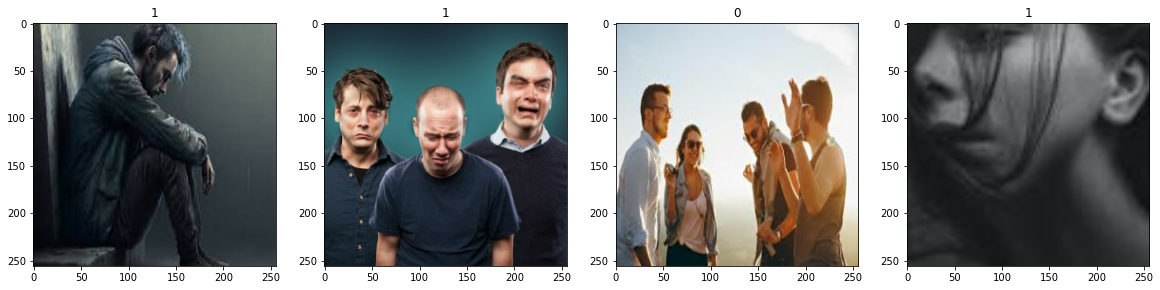

In [15]:
# Create a figure and subplots for visualizing images
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))  # Sets up a figure with 4 subplots in a grid

# Iterate through the first four images in the batch
for idx, img in enumerate(batch[0][:4]):
    # Display the image in the corresponding subplot
    ax[idx].imshow(img.astype(int))  # Converts image values to integers for display
    # Set the subplot title to the corresponding label
    ax[idx].title.set_text(batch[1][idx])  # Displays the label above each image


# 4. Scale Data

In [16]:
# Normalize image pixel values within the dataset
data = data.map(lambda x, y: (x / 255.0, y))  # Rescales pixel values to the range [0, 1]

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [17]:
# Retrieve a batch of data as NumPy arrays from the normalized dataset
data.as_numpy_iterator().next()  # Fetches the next batch after normalization

(array([[[[7.37254918e-01, 8.19607854e-01, 8.39215696e-01],
          [7.45098054e-01, 8.19607854e-01, 8.35294127e-01],
          [7.56862760e-01, 8.27450991e-01, 8.35294127e-01],
          ...,
          [9.68627453e-01, 9.84313726e-01, 9.88235295e-01],
          [9.64705884e-01, 9.80392158e-01, 9.84313726e-01],
          [9.64705884e-01, 9.80392158e-01, 9.84313726e-01]],
 
         [[7.42156863e-01, 8.22549045e-01, 8.43137264e-01],
          [7.49019623e-01, 8.23529422e-01, 8.39215696e-01],
          [7.60784328e-01, 8.31372559e-01, 8.39215696e-01],
          ...,
          [9.68627453e-01, 9.84313726e-01, 9.88235295e-01],
          [9.64705884e-01, 9.80392158e-01, 9.84313726e-01],
          [9.64705884e-01, 9.80392158e-01, 9.84313726e-01]],
 
         [[7.49019623e-01, 8.23529422e-01, 8.39215696e-01],
          [7.56862760e-01, 8.27450991e-01, 8.35294127e-01],
          [7.65686274e-01, 8.36274505e-01, 8.44117641e-01],
          ...,
          [9.72549021e-01, 9.88235295e-01, 9.9215

# 5. Split Data

In [18]:
#set train size to 70% of the data
train_size = int(len(data)*.7)
#set train size to 20% of the data
val_size = int(len(data)*.2)
#set train size to 10% of the data
test_size = int(len(data)*.1)

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model (CNN)

In [20]:
# Create a sequential model instance
model = Sequential()  # Initializes a linear stack of layers

In [21]:
# Add a convolutional layer with 16 filters, 3x3 kernel size, 1 stride, ReLU activation, and input shape
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))

# Add a max pooling layer to downsample the feature maps
model.add(MaxPooling2D())

# Add another convolutional layer with 32 filters, 3x3 kernel size, 1 stride, and ReLU activation
model.add(Conv2D(32, (3, 3), 1, activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D())

# Add a third convolutional layer with 16 filters, 3x3 kernel size, 1 stride, and ReLU activation
model.add(Conv2D(16, (3, 3), 1, activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D())

# Flatten the 2D feature maps into a 1D vector
model.add(Flatten())

# Add a dense (fully connected) layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# Add the final output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))


In [22]:
# Compile the model with the Adam optimizer, binary crossentropy loss, and accuracy metric
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [24]:
logdir='logs'

In [25]:
# Create a TensorBoard callback for visualizing training progress
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [26]:
# Train the model for 20 epochs, using the training data, validation data, and TensorBoard callback
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
7/7 [==============================] - 16s 2s/step - loss: 2.1773 - accuracy: 0.4821 - val_loss: 0.7256 - val_accuracy: 0.4531
Epoch 2/20
7/7 [==============================] - 11s 1s/step - loss: 0.6961 - accuracy: 0.5536 - val_loss: 0.6914 - val_accuracy: 0.6562
Epoch 3/20
7/7 [==============================] - 12s 2s/step - loss: 0.6908 - accuracy: 0.6384 - val_loss: 0.6861 - val_accuracy: 0.7188
Epoch 4/20
7/7 [==============================] - 12s 2s/step - loss: 0.6710 - accuracy: 0.5938 - val_loss: 0.7311 - val_accuracy: 0.5156
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.6498 - accuracy: 0.5938 - val_loss: 0.6003 - val_accuracy: 0.6562
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.6066 - accuracy: 0.6429 - val_loss: 0.4949 - val_accuracy: 0.6406
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.5900 - accuracy: 0.7991 - val_loss: 0.5656 - val_accuracy: 0.8281
Epoch 8/20
7/7 [==================

# 8. Plot Performance

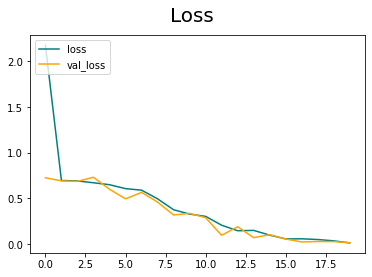

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

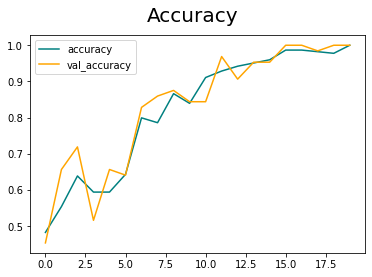

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
# Iterate through the test dataset and evaluate model performance
for batch in test.as_numpy_iterator():
    # Unpack the batch into features (X) and labels (y)
    X, y = batch

    # Generate predictions for the current batch
    yhat = model.predict(X)

    # Update precision, recall, and accuracy metrics
    pre.update_state(y, yhat)  # Calculate precision based on true labels and predictions
    re.update_state(y, yhat)   # Calculate recall based on true labels and predictions
    acc.update_state(y, yhat)  # Calculate accuracy based on true labels and predictions


1/1 [==============================] - 0s 250ms/step


In [40]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

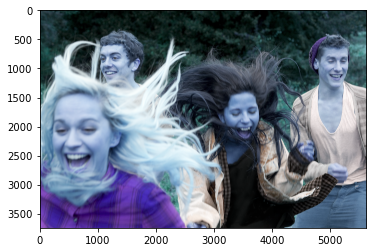

In [41]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

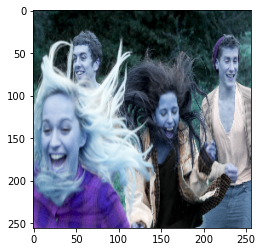

In [42]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
# Generate a prediction for a single image
yhat = model.predict(np.expand_dims(resize / 255, 0))


1/1 [==============================] - 0s 47ms/step


In [44]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


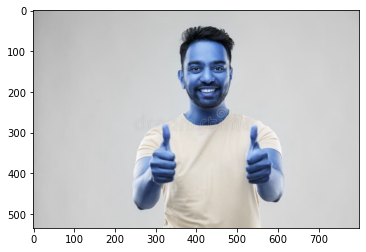

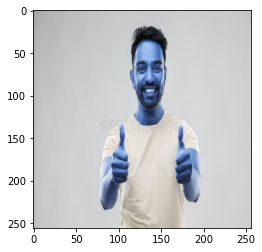

1/1 [==============================] - 0s 32ms/step
Predicted class is Sad


In [45]:
# 1. Load the image using OpenCV
img = cv2.imread('test_pic 2.jpeg')

# 2. Display the original image
plt.imshow(img)
plt.show()

# 3. Resize the image to match model input dimensions
resize = tf.image.resize(img, (256, 256))

# 4. Display the resized image
plt.imshow(resize.numpy().astype(int))
plt.show()

# 5. Normalize and prepare the image for prediction
yhat = model.predict(np.expand_dims(resize / 255, 0))

# 6. Print the prediction
print(yhat)  # Display the raw prediction values

# 7. Interpret the prediction and print the predicted class
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')


# 11. Save the Model

In [46]:
model.save(os.path.join('models','imageclassifier.h5'))

# Build Deep Learning Model (MobileNet) 

In [62]:
# 1. Create image data generators for training and validation
train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)

# 2. Load images from directories and create generators
train_generator = train_data_gen.flow_from_directory(
    directory='data/',  # Path to training image directory
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,  # Process images in batches of 32
    class_mode='binary'  # Binary classification (two classes)
)

val_generator = val_data_gen.flow_from_directory(
    directory='data/',  # Path to validation image directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 304 images belonging to 2 classes.
Found 304 images belonging to 2 classes.


In [63]:
# Load a pre-trained MobileNetV2 model, excluding the top classification layers
base_model = MobileNetV2(
    weights='imagenet',  # Load ImageNet pre-trained weights
    include_top=False,  # Exclude the top classification layers
    input_shape=(224, 224, 3)  # Specify input image dimensions
)


In [64]:
# 1. Create a sequential model and add the pre-trained base model
model = models.Sequential()
model.add(base_model)

# 2. Add a global average pooling layer
model.add(layers.GlobalAveragePooling2D())

# 3. Add a dense output layer with sigmoid activation for binary classification
model.add(layers.Dense(1, activation='sigmoid'))  # Adjust for multi-class if needed

# 4. Freeze the base model layers to prevent their weights from being updated during training
base_model.trainable = False

# 5. Compile the model with optimizer, loss, and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',  # Adjust for multi-class if needed
    metrics=['accuracy']
)


In [65]:
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(1, activation='sigmoid'))  # 1 neuron for binary classification, adjust for more classes

base_model.trainable = False  # Freeze MobileNetV2 layers

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',  # or 'categorical_crossentropy' for more classes
              metrics=['accuracy'])


In [66]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
10/10 [==============================] - 33s 3s/step - loss: 0.8210 - accuracy: 0.5033 - val_loss: 0.6425 - val_accuracy: 0.5987
Epoch 2/10
10/10 [==============================] - 24s 3s/step - loss: 0.5872 - accuracy: 0.6743 - val_loss: 0.4948 - val_accuracy: 0.7599
Epoch 3/10
10/10 [==============================] - 26s 3s/step - loss: 0.4553 - accuracy: 0.7895 - val_loss: 0.4102 - val_accuracy: 0.8257
Epoch 4/10
10/10 [==============================] - 20s 2s/step - loss: 0.3865 - accuracy: 0.8289 - val_loss: 0.3507 - val_accuracy: 0.8520
Epoch 5/10
10/10 [==============================] - 20s 2s/step - loss: 0.3341 - accuracy: 0.8684 - val_loss: 0.3115 - val_accuracy: 0.8783
Epoch 6/10
10/10 [==============================] - 19s 2s/step - loss: 0.3005 - accuracy: 0.8882 - val_loss: 0.2815 - val_accuracy: 0.8980
Epoch 7/10
10/10 [==============================] - 22s 2s/step - loss: 0.2727 - accuracy: 0.9079 - val_loss: 0.2574 - val_accuracy: 0.9112
Epoch 8/10
10/10 [==

In [67]:
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {accuracy}')

model.save('happy_sad_mobilenet.h5')


10/10 [==============================] - 10s 964ms/step - loss: 0.2074 - accuracy: 0.9507
Validation Accuracy: 0.9506579041481018


In [68]:

# 1. Load the saved model
model = load_model('happy_sad_mobilenet.h5')  # Load the trained model from a file

# 2. Load and preprocess the image
img_path = 'test_pic 2.jpeg'  # Path to the image to be tested
img = image.load_img(img_path, target_size=(224, 224))  # Load the image and resize it
img_array = image.img_to_array(img)  # Convert the image to a NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension (required for model input)
img_array /= 255.0  # Normalize pixel values to [0, 1] range

# 3. Make predictions
predictions = model.predict(img_array)  # Use the model to predict on the prepared image

# 4. Interpret the results
if predictions[0][0] > 0.5:  # If the predicted probability for "Happy" is greater than 0.5
    print("Prediction: Happy")
else:
    print("Prediction: Sad")


1/1 [==============================] - 1s 1s/step
Prediction: Happy


# Alexnet

In [69]:
def alexnet_model(input_shape=(256, 256, 3), num_classes=2):
    # Create a sequential model
    model = tf.keras.models.Sequential()

    # Layer 1
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))  # 1st convolutional layer
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))  # Downsampling with max pooling

    # Layer 2
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))  # 2nd convolutional layer
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))  # Downsampling with max pooling

    # Layer 3-5 (additional convolutional layers)
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))  # Downsampling with max pooling

    # Flatten the output from convolutional layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(4096, activation='relu'))  # Large dense layer with ReLU activation
    model.add(Dropout(0.5))  # Regularization with dropout

    model.add(Dense(4096, activation='relu'))  # Another large dense layer
    model.add(Dropout(0.5))  # More regularization

    # Output layer with sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create an AlexNet model instance
alexnet_model = alexnet_model()

# Display the model summary (architecture and parameter count)
alexnet_model.summary()

# Train the model
logdir = 'logs'  # Directory for saving TensorBoard logs
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)  # Create TensorBoard callback
hist = alexnet_model.fit(train, epochs=10, validation_data=val, batch_size=16, callbacks=[tensorboard_callback])

# Save the trained model to a file
alexnet_model.save('C:\\Users\\Blu-Ray\\Desktop\\5th term\\Tools\\final project.h5')


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 96)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 384)       885120    
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 384)      

In [72]:
# Function to preprocess an image for the model
def preprocess_image(img_path):
    # Read the image using OpenCV
    img = cv2.imread(img_path)

    # Resize the image to match the model's expected input size
    img = cv2.resize(img, (256, 256))

    # Normalize pixel values to the range [0, 1]
    img = img / 255.0

    # Add a batch dimension (required for model input)
    img = np.expand_dims(img, axis=0)

    return img

# Function to perform validation on a single image
def validate_single_image(img_path, model):
    # Preprocess the image
    preprocessed_img = preprocess_image(img_path)

    # Generate predictions using the model
    predictions = model.predict(preprocessed_img)

    # Assuming the model predicts class probabilities, get the predicted class
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest probability

    return predicted_class[0]  # Extract the actual class index

# Example usage:
test_image_path = 'test_pic 2.jpeg'
predicted_class = validate_single_image(test_image_path, alexnet_model)

# Interpret the results (assuming 0 = Happy, 1 = Sad)
if predicted_class < 1:
    print("Prediction: Happy")
else:
    print("Prediction: Sad")


1/1 [==============================] - 0s 73ms/step
Prediction: Happy


In [ ]:
from tensorflow.keras.applications import InceptionV3



In [ ]:
# Create a sequential model
model_inc = Sequential()

# Add the pre-trained InceptionV3 base
model_inc.add(InceptionV3(
    weights='imagenet',  # Load pre-trained ImageNet weights
    include_top=False,  # Exclude the original top layers
    input_shape=(256, 256, 3)  # Specify input image dimensions
))

# Flatten the output from the convolutional base
model_inc.add(Flatten())

# Add a dense layer with 256 neurons and ReLU activation
model_inc.add(Dense(256, activation='relu'))

# Add an output layer with 1 neuron and sigmoid activation (likely for binary classification)
model_inc.add(Dense(1, activation='sigmoid'))


In [ ]:
model_inc.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model_inc.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 73728)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               18874624  
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 40677665 (155.17 MB)
Trainable params: 40643233 (155.04 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


In [ ]:
logdir3 = 'logs_model_inc'
tensorboard_callback3 = tf.keras.callbacks.TensorBoard(log_dir=logdir3)
hist3 = model_inc.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback3])

Epoch 1/20
7/7 [==============================] - 681s 31s/step - loss: 0.0862 - accuracy: 0.9732 - val_loss: 2.3006 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 65s 9s/step - loss: 0.0466 - accuracy: 0.9821 - val_loss: 0.6286 - val_accuracy: 0.9219
Epoch 3/20
7/7 [==============================] - 52s 7s/step - loss: 0.0305 - accuracy: 0.9866 - val_loss: 0.6054 - val_accuracy: 0.8906
Epoch 4/20
7/7 [==============================] - 58s 8s/step - loss: 0.0480 - accuracy: 0.9821 - val_loss: 0.7416 - val_accuracy: 0.8594
Epoch 5/20
7/7 [==============================] - 88s 13s/step - loss: 0.0216 - accuracy: 0.9866 - val_loss: 1.2138 - val_accuracy: 0.7812
Epoch 6/20
7/7 [==============================] - 65s 9s/step - loss: 0.0196 - accuracy: 0.9911 - val_loss: 1.1943 - val_accuracy: 0.8125
Epoch 7/20
7/7 [==============================] - 49s 7s/step - loss: 0.0107 - accuracy: 0.9955 - val_loss: 0.3299 - val_accuracy: 0.9062
Epoch 8/20
7/7 [===============

In [ ]:
import cv2

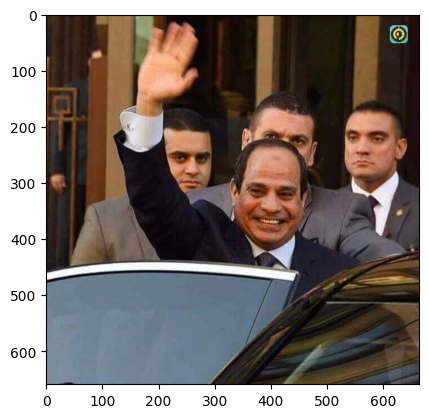

In [ ]:
img = cv2.imread('val2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


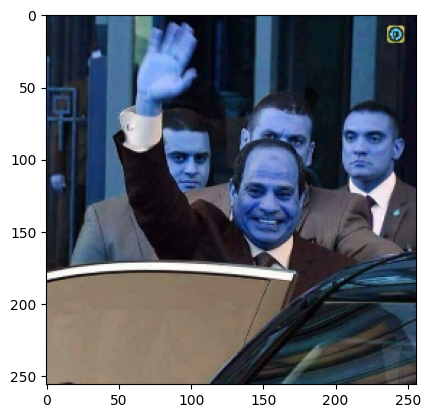

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat =model_inc.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 4s 4s/step


array([[0.03857728]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
